**Business Objective**

Rampant fraud in US healthcare system results in increased premiums for many vulnerable citizens who cannot afford to pay hefty price for a fundamental right such as healthcare. The aim is to find patterns of fraud commited by providers and train ML models to detect similar patterns in the future. Dataset for this capstone project is obtained from Kaggle [here](https://www.kaggle.com/code/rohitrox/medical-provider-fraud-detection/data).

---


Abuse in healthcare system can take many forms, such as:

*Billing for services that were not rendered.

*Duplicate submission of a claim for the same service.

*Charging for a more complex or expensive than was actually provided.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#--- google drive refs
m_kstrRoot = '/content/drive/My Drive/Colab Notebooks/fourthbrain.ai/'
m_kstrRoot = m_kstrRoot + 'capstone/'
m_kstrData = m_kstrRoot + 'data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# pre-reqs

In [ ]:
#--- imports;  versions reqs listed are from local fastapi dev env:  prod_capstone  
import pandas as pd               #--- pandas==1.5.3
import numpy as np                #--- numpy==1.24.1
#import scikit-learn               #--- scikit-learn >=1.2.0 
import sklearn                    #--- sklearn=0.0.post1            
import pickle                     #--- pickle >= 4.0
            

def persistScaler(scalarObj):
  #--- persist the std scaler
  with open(m_kstrData + "std_scaler_colab.pkl", 'wb') as filPkl:
      pickle.dump(scalarObj, filPkl)

def persistLogRegr_model(modelObj):
  with open(m_kstrData + "lgr_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)

def persistSVM_model(modelObj):
  with open(m_kstrData + "svm_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)

def persistGBC_model(modelObj):
  with open(m_kstrData + "gbc_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)


def persistEnc_model(modelObj):
  with open(m_kstrData + "enc_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)


def persistKMeans_model(modelObj):
  with open(m_kstrData + "kmn_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)


def prereq_createCondaEnv():

  try:
    print("INFO:  activating conda env_capstone ...")
    !conda activate env_capstone
  except CommandNotFoundError:
    #--- possibly, conda is not initialized?
    print("EXCEPTION: ... CommandNotFoundError")
    !conda init bash
    !conda create --name env_capstone python=3.10.8
  except excE:
    print("EXCEPTION: ... ", excE)
  finally:
    !conda activate env_capstone
    
'''    
  try:
    print("INFO:  creating new conda env_capstone ...")
    !conda create --name env_capstone python=3.10.8
  except:
    #--- possibly the env already exists?

 
    !conda create --name env_capstone python=3.10.8
'''



def prereq_getCurrVersions():
  print("INFO:  get current dep versions ...")
  print("python.v: ")                               #--- python 3.10.8
  !python -V

  print("pd.v: ", pd.__version__)                   #--- pandas 1.5.3
  print("np.v: ", np.__version__)                   #--- numpy 1.24.1
  print("sk.v: ", sklearn.__version__)              #--- sklearn >=0.0.post1
  #print("skl.v: ", scikit-learn.__version__)        #--- scikit-learn ==1.2.0
  print("pkl.v: ", pickle.format_version)           #--- pickle >= 4.0


def prereq_upgradePython():
  print("INFO:  upgrading python ...")
  !wget https://github.com/korakot/kora/releases/download/v0.10/py310.sh
  !bash ./py310.sh -b -f -p /usr/local
  !python -m ipykernel install --name "py310" --user


def prereq_upgradeDeps():
  #--- optional exec:  ensure minimum libraries and versions
  print("INFO:  upgrading dependencies ...")
  !pip3 install -U pandas>=1.5.3
  !pip3 install -U numpy>=1.24.1

  #!pip3 uninstall scikit-learn -y
  #!pip3 install -U scikit-learn==1.2.0
  #!pip3 install -U sklearn==0.0.post1
  !pip3 install -U sklearn==1.2.0
  
  !pip install -U pickle>=4.0
  #--- optional exec:  determine default colab libraries and versions


In [ ]:
#!pip3 uninstall scikit-learn -y
#!pip3 install -U scikit-learn==1.2.0
#!pip3 install -U sklearn==0.0.post1


In [ ]:
#!conda --version
#!conda env list
#!conda info | grep -i 'base environment'
#!export PATH=”/anaconda3/bin:$PATH”
#!source ~/anaconda3/etc/profile.d/conda.sh
#!source /usr/local/anaconda3/etc/profile.d/conda.sh
#!conda create --name env_capstone python=3.10.8
#!conda init bash
#!conda activate env_capstone

#!source ~/miniconda3/bin/activate
#!ls -la /usr/bin/ana*
#!ls -la /usr/local/bin/conda-env
!ls -la /usr/local/envs/env_capstone/


In [ ]:
%%bash
source activate env_capstone

In [ ]:
%%bash
conda init bash
conda activate env_capstone
conda env list

In [ ]:
%%bash
conda init

In [ ]:
prereq_createCondaEnv()
  

In [ ]:
if (False):
  prereq_getCurrVersions()

  #--- upgrade dependencies
  prereq_upgradePython()
  prereq_upgradeDeps()

  prereq_getCurrVersions()

In [ ]:
prereq_getCurrVersions()

INFO:  get current dep versions ...
python.v: 
Python 3.10.6
pd.v:  1.3.5
np.v:  1.21.6
sk.v:  1.2.1
pkl.v:  4.0


In [ ]:
!pip list | grep learn

scikit-learn                  1.2.0
sklearn                       0.0.post1


In [ ]:
prereq_upgradeDeps()

INFO:  upgrading dependencies ...
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


# declarations

In [ ]:
#--- imports;  versions reqs listed are from local fastapi dev env:  prod_capstone  
import pandas as pd               #--- pandas==1.5.3
import numpy as np                #--- numpy==1.24.1
import sklearn                    #--- sklearn=0.0.post1;  scikit-learn >=1.2.1            
import pickle                     #--- pickle >= 4.0

pd.__version__,  np.__version__
sklearn.__version__, pickle.format_version



#--- declarations; initializations
global m_test_df
global m_test_beneficiary_df
global m_test_inpatient_df 
global m_test_outpatient_df



In [ ]:
m_dct_runModes = {
    "enum_mle_exploration": 0,
    "enum_export_models": 1
    }


#--- fetch train and test files
def batch_fetchData():
  global m_test_df = pd.read_csv(m_kstrData + 'Test-1542969243754.csv') 
  global m_test_beneficiary_df = pd.read_csv(m_kstrData + 'Test_Beneficiarydata-1542969243754.csv')
  global m_test_inpatient_df = pd.read_csv(m_kstrData + 'Test_Inpatientdata-1542969243754.csv')
  global m_test_outpatient_df = pd.read_csv(m_kstrData + 'Test_Outpatientdata-1542969243754.csv') 


#--- data eng
def batch_dataEng():
    global m_test_beneficiary_df = prep_benefData(pdfTest_benef)
    pdfTest_inpat = prep_inpatData(pdfTest_inpat)

# configuration

In [ ]:
#--- set batch run mode
m_enm_runMode = m_dct_runModes("enum_export_models")


if (m_enm_runMode==m_dct_runModes("enum_export_models")):
  batch_fetchData()





# Fetching Train and Test Files

In [ ]:
import numpy as np
import pickle

In [ ]:
!ls /content/drive/MyDrive/fourthbrain

dog_dataset				Train_Beneficiarydata-1542865627584.csv
Test-1542969243754.csv			Train_Inpatientdata-1542865627584.csv
Test_Beneficiarydata-1542969243754.csv	Train_Outpatientdata-1542865627584.csv
Test_Inpatientdata-1542969243754.csv	tweets.csv.gz
Test_Outpatientdata-1542969243754.csv	twitter-mask.png
Train-1542865627584.csv


In [ ]:
import pandas as pd
import os
pathname = '/content/drive/MyDrive/fourthbrain'

#--- override
pathname = m_kstrData

train_df = pd.read_csv(os.path.join(pathname,'Train-1542865627584.csv'))
train_beneficiary_df = pd.read_csv(os.path.join(pathname,'Train_Beneficiarydata-1542865627584.csv'))
train_inpatient_df = pd.read_csv(os.path.join(pathname,'Train_Inpatientdata-1542865627584.csv'))
train_outpatient_df = pd.read_csv(os.path.join(pathname,'Train_Outpatientdata-1542865627584.csv'))

test_df = pd.read_csv(os.path.join(pathname,'Test-1542969243754.csv'))
test_beneficiary_df = pd.read_csv(os.path.join(pathname,'Test_Beneficiarydata-1542969243754.csv'))
test_inpatient_df = pd.read_csv(os.path.join(pathname,'Test_Inpatientdata-1542969243754.csv'))
test_outpatient_df = pd.read_csv(os.path.join(pathname,'Test_Outpatientdata-1542969243754.csv'))

# Data Engineering on Beneficiary Dataset

In [ ]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [ ]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [ ]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [ ]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

In [ ]:
cols = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke'] 

for col in cols:
  train_beneficiary_df.replace({col: 2}, 0, inplace=True)
  test_beneficiary_df.replace({col: 2}, 0, inplace=True)

In [ ]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

0    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [ ]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

0    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [ ]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [ ]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

## Person's Age on Train dataset

In [ ]:
train_beneficiary_df['DOB'] = pd.to_datetime(train_beneficiary_df['DOB'], format = '%Y-%m-%d')
train_beneficiary_df['DOD'] = pd.to_datetime(train_beneficiary_df['DOD'], format = '%Y-%m-%d') 
train_beneficiary_df['Age'] = round((train_beneficiary_df['DOD'] - train_beneficiary_df['DOB']).dt.days/365) 

In [ ]:
train_beneficiary_df['Age'].isna().sum(), train_beneficiary_df.shape[0]

(137135, 138556)

**Take-away message**

There are 1421 beneficiaries still alive and we need to calculate their age as well. 

In [ ]:
train_beneficiary_df['DOD'].max()

Timestamp('2009-12-01 00:00:00')

**Take-away message**
Beneficiary data was last recorded on 2009-12-01, so we can calculate age of people that are still alive based on this date. 

In [ ]:
train_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - train_beneficiary_df['DOB']).dt.days)/365), inplace=True)

In [ ]:
train_beneficiary_df.Age.isna().sum()

0

## Person's Age on Test dataset

In [ ]:
test_beneficiary_df['DOB'] = pd.to_datetime(test_beneficiary_df['DOB'], format = '%Y-%m-%d')
test_beneficiary_df['DOD'] = pd.to_datetime(test_beneficiary_df['DOD'], format = '%Y-%m-%d') 
test_beneficiary_df['Age'] = round((test_beneficiary_df['DOD'] - test_beneficiary_df['DOB']).dt.days/365)

In [ ]:
test_beneficiary_df['Age'].isna().sum(), test_beneficiary_df.shape[0]


(63394, 63968)

In [ ]:
63968 - 63394 

574

**Take-away message**

In the test dataset, there are 574 beneficiaries that are still alive. We'll calculate their age based on the last recorded date. 

In [ ]:
test_beneficiary_df['DOD'].max()


Timestamp('2009-12-01 00:00:00')

In [ ]:
test_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - test_beneficiary_df['DOB']).dt.days)/365), inplace=True)


In [ ]:
test_beneficiary_df.Age.isna().sum()


0

## Add dead flag column

In [ ]:
train_beneficiary_df.shape

(138556, 26)

In [ ]:
train_beneficiary_df['DOD'].isna().sum(), train_beneficiary_df['DOD'].notna().sum()

(137135, 1421)

In [ ]:
train_beneficiary_df.loc[train_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
train_beneficiary_df.loc[train_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

In [ ]:
train_beneficiary_df['DeadOrNot'].value_counts()

0.0    137135
1.0      1421
Name: DeadOrNot, dtype: int64

In [ ]:
test_beneficiary_df.shape

(63968, 26)

In [ ]:
test_beneficiary_df['DOD'].isna().sum(), test_beneficiary_df['DOD'].notna().sum()


(63394, 574)

In [ ]:
test_beneficiary_df.loc[test_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
test_beneficiary_df.loc[test_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

In [ ]:
test_beneficiary_df['DeadOrNot'].value_counts()

0.0    63394
1.0      574
Name: DeadOrNot, dtype: int64

# Data Engineering for in-patient dataset

**Calculating Admitted Days**

Creating a new feature 'AdmittedDays' based on AdmissionDt and DischargeDt

In [ ]:
train_inpatient_df['AdmissionDt'] = pd.to_datetime(train_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
train_inpatient_df['DischargeDt'] = pd.to_datetime(train_inpatient_df['DischargeDt'], format='%Y-%m-%d')
train_inpatient_df['AdmittedDays'] = round((train_inpatient_df['DischargeDt'] - train_inpatient_df['AdmissionDt']).dt.days + 1) 
                                           
test_inpatient_df['AdmissionDt'] = pd.to_datetime(test_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
test_inpatient_df['DischargeDt'] = pd.to_datetime(test_inpatient_df['DischargeDt'], format='%Y-%m-%d')
test_inpatient_df['AdmittedDays'] = round((test_inpatient_df['DischargeDt'] - test_inpatient_df['AdmissionDt']).dt.days + 1)

In [ ]:
train_inpatient_df['AdmittedDays'].isna().sum()

0

In [ ]:
test_inpatient_df['AdmittedDays'].isna().sum()

0

# Merging Inpatient and Outpatient dataset

In [ ]:
key_columns_to_merge = list(train_outpatient_df.columns)
key_columns_to_merge

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [ ]:
train_merged_patient_data = train_inpatient_df.merge(train_outpatient_df, on=key_columns_to_merge, how='outer')
train_merged_patient_data.shape

(558211, 31)

In [ ]:
key_columns_to_merge_test = list(test_outpatient_df.columns)
key_columns_to_merge_test

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [ ]:
test_merged_patient_data = test_inpatient_df.merge(test_outpatient_df, on=key_columns_to_merge_test, how='outer')
test_merged_patient_data.shape

(135392, 31)

# Merging Beneficiary with All-patient data

In [ ]:
trainAllPatientDetailsData = train_merged_patient_data.merge(train_beneficiary_df, on='BeneID', how='inner')
trainAllPatientDetailsData.shape

(558211, 57)

In [ ]:
testAllPatientDetailsData = test_merged_patient_data.merge(test_beneficiary_df, on='BeneID', how='inner')
testAllPatientDetailsData.shape

(135392, 57)

# Merging all-patients data with provider data with fraud label

In [ ]:
trainAllPatientDetailsProvider = trainAllPatientDetailsData.merge(train_df, on='Provider', how='inner')
trainAllPatientDetailsProvider.shape

(558211, 58)

In [ ]:
testAllPatientDetailsProvider = testAllPatientDetailsData.merge(test_df, on='Provider', how='inner')
testAllPatientDetailsProvider.shape

(135392, 57)

In [ ]:
test_columns = list(testAllPatientDetailsProvider.columns)

In [ ]:
train_columns = trainAllPatientDetailsProvider.columns

In [ ]:
[test for test in train_columns if test not in test_columns]

['PotentialFraud']

In [ ]:
test_df.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


# Missing value information in final dataset

In [ ]:
trainAllPatientDetailsProvider.isna().sum()*100/len(trainAllPatientDetailsProvider)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                

In [ ]:
testAllPatientDetailsProvider.isna().sum()*100/len(testAllPatientDetailsProvider)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
AdmissionDt                         92.945669
ClmAdmitDiagnosisCode               73.886197
DeductibleAmtPaid                    0.144765
DischargeDt                         92.945669
DiagnosisGroupCode                  92.945669
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                

# Feature Engineering

In [ ]:
pd.set_option('display.max_columns', None)
trainAllPatientDetailsProvider.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmittedDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,13.0,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,19.0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,5.0,1930-07-01,NaT,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes


In [ ]:
columns_to_remove = ['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
                     'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                     'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                     'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                     'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                     'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                     'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                     'ClmAdmitDiagnosisCode', 'AdmissionDt',
                     'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
                     'State', 'County']

train_final = trainAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
train_final.shape

(558211, 27)

In [ ]:
train_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     899
AdmittedDays                       517737
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [ ]:
test_final = testAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
test_final.shape

(135392, 26)

In [ ]:
test_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     196
AdmittedDays                       125841
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [ ]:
train_final.Gender = train_final.Gender.astype('category')
train_final.Race = train_final.Race.astype('category')

In [ ]:
test_final.Gender = test_final.Gender.astype('category')
test_final.Race = test_final.Race.astype('category')

## One-hot encoding

In [ ]:
train_final = pd.get_dummies(train_final, columns=['Gender', 'Race'], drop_first=True)
train_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud,Gender_2,Race_2,Race_3,Race_5
0,PRV55912,26000,1068.0,7.0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes,0,0,0,0
1,PRV55912,50,0.0,NaN,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes,0,0,0,0
2,PRV55912,19000,1068.0,13.0,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes,1,0,0,0
3,PRV55912,17000,1068.0,19.0,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes,0,0,0,0
4,PRV55912,13000,1068.0,5.0,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes,1,0,0,0


In [ ]:
train_final.loc[train_final['PotentialFraud'] == 'Yes', 'PotentialFraud'] = 1
train_final.loc[train_final['PotentialFraud'] == 'No', 'PotentialFraud'] = 0

In [ ]:
train_final['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [ ]:
test_final = pd.get_dummies(test_final, columns=['Gender', 'Race'], drop_first=True)
test_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5
0,PRV57070,9000,1068.0,8.0,Y,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,82.0,0.0,1,0,0,0
1,PRV57070,3000,1068.0,3.0,0,12,12,1,1,1,0,1,1,1,1,0,1,0,8000,2136,2540,1880,83.0,0.0,1,0,0,0
2,PRV57070,7000,1068.0,7.0,Y,12,12,0,1,1,0,1,0,0,1,1,0,0,10200,2136,40,100,82.0,0.0,1,0,0,0
3,PRV57070,5000,1068.0,9.0,0,12,12,0,0,1,0,1,0,0,1,1,0,0,5000,1068,600,180,95.0,0.0,1,0,0,0
4,PRV57070,9000,1068.0,11.0,Y,12,12,1,1,1,1,1,0,1,1,0,1,0,9000,1068,10,40,76.0,0.0,1,0,0,0


In [ ]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
train_final.loc[train_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [ ]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
test_final.loc[test_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [ ]:
test_final['RenalDiseaseIndicator'].value_counts()

0    109143
1     26249
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
train_final['DeductibleAmtPaid'].fillna(0, inplace=True)
train_final['AdmittedDays'].fillna(0, inplace=True)

In [ ]:
train_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
PotentialFraud                     0
Gender_2                           0
Race_2                             0
R

In [ ]:
test_final['DeductibleAmtPaid'].fillna(0, inplace=True)
test_final['AdmittedDays'].fillna(0, inplace=True)

In [ ]:
test_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
Gender_2                           0
Race_2                             0
Race_3                             0
R

In [ ]:
train_final['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

## Check for correlated columns

In [ ]:
train_final.shape

(558211, 29)

In [ ]:
cor = train_final.corr() 

keep_columns = np.full(cor.shape[0], True) 

for i in range(cor.shape[0]-1):
  for j in range(i+1, cor.shape[0]-1):
    if (np.abs(cor.iloc[i,j]) >= 0.8):
      keep_columns[i] = False 

#selected_columns = train_final.columns[keep_columns]

keep_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
test_final.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot',
       'Gender_2', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object')

## New features for better predictions

In [ ]:
train_final['InscClaimReimbursement_ProviderAvg'] = train_final.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('mean')
test_final['InscClaimReimbursement_ProviderAvg'] = test_final.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('mean')

In [ ]:
train_final['DeductibleAmtPaid_ProviderAvg'] = train_final.groupby(['Provider'])['DeductibleAmtPaid'].transform('mean')
test_final['DeductibleAmtPaid_ProviderAvg'] = test_final.groupby(['Provider'])['DeductibleAmtPaid'].transform('mean')

In [ ]:
train_final['IPAnnualReimbursementAmt_ProviderAvg'] = train_final.groupby(['Provider'])['IPAnnualReimbursementAmt'].transform('mean')
test_final['IPAnnualReimbursementAmt_ProviderAvg'] = test_final.groupby(['Provider'])['IPAnnualReimbursementAmt'].transform('mean')

In [ ]:
train_final['IPAnnualDeductibleAmt_ProviderAvg'] = train_final.groupby(['Provider'])['IPAnnualDeductibleAmt'].transform('mean')
test_final['IPAnnualDeductibleAmt_ProviderAvg'] = test_final.groupby(['Provider'])['IPAnnualDeductibleAmt'].transform('mean')

In [ ]:
train_final['OPAnnualReimbursementAmt_ProviderAvg'] = train_final.groupby(['Provider'])['OPAnnualReimbursementAmt'].transform('mean')
test_final['OPAnnualReimbursementAmt_ProviderAvg'] = test_final.groupby(['Provider'])['OPAnnualReimbursementAmt'].transform('mean')

In [ ]:
train_final['OPAnnualDeductibleAmt_ProviderAvg'] = train_final.groupby(['Provider'])['OPAnnualDeductibleAmt'].transform('mean')
test_final['OPAnnualDeductibleAmt_ProviderAvg'] = test_final.groupby(['Provider'])['OPAnnualDeductibleAmt'].transform('mean')

# Train & validation split

In [ ]:
train_final_groupby = train_final.groupby(['Provider', 'PotentialFraud'], as_index = False).agg('sum')

train_final_groupby.shape

(5410, 34)

In [ ]:
test_final_groupby = test_final.groupby(['Provider'], as_index=False).agg('sum')
test_final_groupby.shape

(1353, 33)

In [ ]:
test_final_groupby.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot', 'Gender_2', 'Race_2',
       'Race_3', 'Race_5', 'InscClaimReimbursement_ProviderAvg',
       'DeductibleAmtPaid_ProviderAvg', 'IPAnnualReimbursementAmt_ProviderAvg',
       'IPAnnualDeductibleAmt_ProviderAvg',
       'OPAnnualReimbursementAmt_ProviderAvg',
       'OPAnnualDeductibleAmt_ProviderAvg'],
      dtype='object')

In [ ]:
X = train_final_groupby.drop(columns=['Provider', 'PotentialFraud'], axis=1)
y = train_final_groupby['PotentialFraud']
y = y.astype('int')

In [ ]:
train_final_groupby.shape

(5410, 34)

In [ ]:
test_final_groupby.shape

(1353, 33)

In [ ]:
train_final_groupby.loc[train_final_groupby['Provider'] == 'PRV51003'].head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,InscClaimReimbursement_ProviderAvg,DeductibleAmtPaid_ProviderAvg,IPAnnualReimbursementAmt_ProviderAvg,IPAnnualDeductibleAmt_ProviderAvg,OPAnnualReimbursementAmt_ProviderAvg,OPAnnualDeductibleAmt_ProviderAvg
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,10,41,54,100,112,33,38,12,999000,122948,353520,97300,10553.0,1.0,78.0,24.0,0.0,1.0,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0


In [ ]:
train_final_groupby['Provider'].value_counts()

PRV51001    1
PRV55516    1
PRV55527    1
PRV55525    1
PRV55523    1
           ..
PRV53246    1
PRV53245    1
PRV53244    1
PRV53243    1
PRV57763    1
Name: Provider, Length: 5410, dtype: int64

**Standard Scaler**


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_minmax = scaler.fit_transform(X) # Train dataset
X_test = scaler.transform(test_final_groupby.iloc[:, 1:]) # Test dataset

In [ ]:

persistScaler(scaler)


**Train and validation split**

In [ ]:
from sklearn.model_selection import train_test_split

# Stratify = y will ensure equal number of potential fraud cases in train and validation dataset 
X_train, X_val, y_train, y_val = train_test_split(X_minmax, y, test_size=0.3, random_state=2022, stratify=y, shuffle=True)

In [ ]:
print(f'X train dataset: {X_train.shape}')
print(f'y train dataset: {y_train.shape}')

X train dataset: (3787, 32)
y train dataset: (3787,)


In [ ]:
print(f'X validation dataset: {X_val.shape}')
print(f'y validation dataset: {y_val.shape}')

X validation dataset: (1623, 32)
y validation dataset: (1623,)


In [ ]:
X_val[0,:]

array([-0.31897753, -0.31732824, -0.31190787, -0.21248512, -0.21257621,
       -0.34340524, -0.19485988, -0.12278404, -0.25557352, -0.23252876,
       -0.18599364, -0.20315994, -0.21607582, -0.1953917 , -0.33266682,
       -0.38630658, -0.05298077, -0.25966756, -0.18723404, -0.18039556,
       -0.22352393, -0.32994963, -0.26495847, -0.35820504, -0.17022483,
       -0.19598378, -0.31897753, -0.31732824, -0.05298077, -0.25966756,
       -0.18723404, -0.18039556])

# Model I: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)

In [ ]:
%%time
#lr = LogisticRegression(featuresCol=selected_columns, labelCol='Purchase', maxIter=10)
lr = LogisticRegressionCV(cv=10, class_weight='balanced', random_state=2022)
lr_model = lr.fit(X_train, y_train) 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

CPU times: user 5.39 s, sys: 6.29 s, total: 11.7 s
Wall time: 12.1 s


In [ ]:
#--- persist lgr_model
persistLogRegr_model(lr_model)

In [ ]:
# Predict probabilities for X_train and X_val
lr_train_pred_probability = lr.predict_proba(X_train)
lr_val_pred_probability = lr.predict_proba(X_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


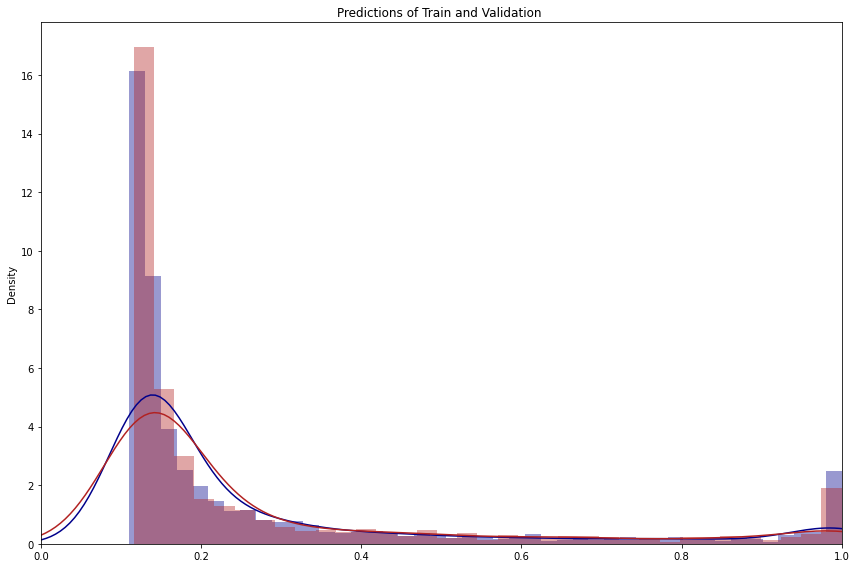

In [ ]:
# Lets compare model prediction performance on train and Validation both.
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12,8))

sns.distplot(lr.predict_proba(X_train)[:,1],color='darkblue')
sns.distplot(lr.predict_proba(X_val)[:,1],color='firebrick')
plt.title('Predictions of Train and Validation ')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

In [ ]:
#persist plot
def persistPltImage(pltObj, strPngName):
  #pltObj.show()
  pltObj.savefig(strPngName)

strFile = m_kstrData + "lgr_trainVal_probPred_colab.png"
print(strFile)
persistPltImage(plt, strFile)
#persistPltImage(plt, "lgr_trainVal_probPred_colab.png")

/content/drive/My Drive/Colab Notebooks/fourthbrain.ai/capstone/data/lgr_trainVal_probPred_colab.png


<Figure size 432x288 with 0 Axes>

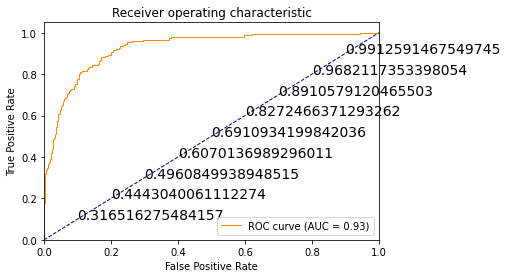

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,lr.predict_proba(X_val)[:,1])         
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Precision Vs Recall')

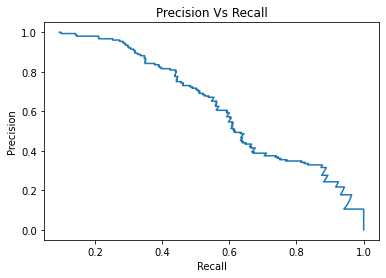

In [ ]:
## Lets Check precision and recall 
precision, recall, _ = precision_recall_curve(y_val, lr.predict_proba(X_val)[:,1])

plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')

In [ ]:
lr_train_pred_60=(lr.predict_proba(X_train)[:,1]>0.60).astype(bool)
lr_val_pred_60=(lr.predict_proba(X_val)[:,1]>0.60).astype(bool)   # set threshold as 0.60

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, lr_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, lr_val_pred_60,labels=[1,0])
print('\nConfusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('\nAccuracy Train:\t\t', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val:\t\t', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train:\t', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val:\t', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train:\t', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val:\t', specificity1)

KappaValue=cohen_kappa_score(y_val, lr_val_pred_60)
print("Kappa Value:\t\t",KappaValue)
AUC=roc_auc_score(y_val, lr_val_pred_60)

print("\nAUC:\t\t\t",AUC)

print("F1-Score Train:\t\t",f1_score(y_train, lr_train_pred_60))

print("F1-Score Val:\t\t",f1_score(y_val, lr_val_pred_60))

Confusion Matrix Train : 
 [[ 258   96]
 [ 216 3217]]

Confusion Matrix Val: 
 [[ 106   46]
 [ 101 1370]]

Accuracy Train:		 0.917612886189596
Accuracy Val:		 0.9094269870609981
Sensitivity Train:	 0.7288135593220338
Sensitivity Val:	 0.6973684210526315
Specificity Train:	 0.9370812700262161
Specificity Val:	 0.9313392250169953
Kappa Value:		 0.5409511495413956

AUC:			 0.8143538230348133
F1-Score Train:		 0.6231884057971013
F1-Score Val:		 0.5905292479108636


# Model II: Support Vector Machines

In [ ]:
%%time
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=0, tol=1e-5) # YOUR CODE HERE 
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_val)

CPU times: user 507 ms, sys: 0 ns, total: 507 ms
Wall time: 510 ms


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)

def display_metrics(y_true, y_pred):
    print(f"Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}")
    print(f"\nF1 Score:\t {f1_score(y_true, y_pred):.3f}")
    print(f"Accuracy:\t {accuracy(y_true, y_pred):.3f}")
    print(f"Recall:\t\t {recall(y_true, y_pred):.3f}")
    print(f"Precision:\t {precision(y_true, y_pred):.3f}")

In [ ]:
display_metrics(y_val, svm_pred)

Confusion Matrix: 
[[1454   17]
 [  97   55]]

F1 Score:	 0.491
Accuracy:	 0.930
Recall:		 0.362
Precision:	 0.764


In [ ]:
persistSVM_model(svm_model)

# Model III: Gradient Boosting Classifier

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42) # YOUR CODE HERE
gbt_model.fit(X_train, y_train)
gbt_pred = gbt_model.predict(X_val)

CPU times: user 1.08 s, sys: 18.1 ms, total: 1.1 s
Wall time: 1.2 s


In [ ]:
display_metrics(y_val, gbt_pred)

Confusion Matrix: 
[[1401   70]
 [  60   92]]

F1 Score:	 0.586
Accuracy:	 0.920
Recall:		 0.605
Precision:	 0.568


In [ ]:
persistGBC_model(gbt_model)

# SHAP Explanability

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

In [ ]:
import shap
X_train_summary = shap.kmeans(X_train, 10)

ModuleNotFoundError: ignored

In [ ]:
explainer = shap.KernelExplainer(gbt_model.predict, X_train_summary)

In [ ]:
%%time
shap_values = explainer.shap_values(y_val.iloc[0, :]) # YOUR CODE HERE

IndexingError: ignored

# Auto - ML

In [ ]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.3 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=9d7938eb0cab3b54a1cb13ba6921a895a07287b38f675e4de14c5f3ab836bcac
  Stored in directory: /root/.cache/pip/wheels/ac/b6/fc/67f7dd6291ee9a509bb12bb9b80773eed4b88bd55292ac672f
Successfully built stopit


In [ ]:
%%time
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, 
                      population_size=16,
                      scoring='f1',# YOUR CODE HERE
                      verbosity=2,
                      random_state=42)
tpot.fit(X_train, y_train)
print(f"Tpop score on test data: {tpot.score(X_val, y_val):.2f}")
tpot.export('tpot_electronics_pipeline.py')

ModuleNotFoundError: ignored

# Summary

**This notebook shows various supervised techniques used to predict anomalies at the provider level.**